In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

dataset_path = r"C:\Users\user\Desktop\Minor sem 6\splitted\splitted"
train_dir = r"C:\Users\user\Desktop\Minor sem 6\splitted\splitted\train"
test_dir = r"C:\Users\user\Desktop\Minor sem 6\splitted\splitted\test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),          
    transforms.Normalize((0.5,), (0.5,))  
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print("Classes:", train_dataset.classes)
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))

Classes: ['electronic', 'glass', 'metal', 'organic', 'paper', 'plastic']
Number of training samples: 840
Number of test samples: 360


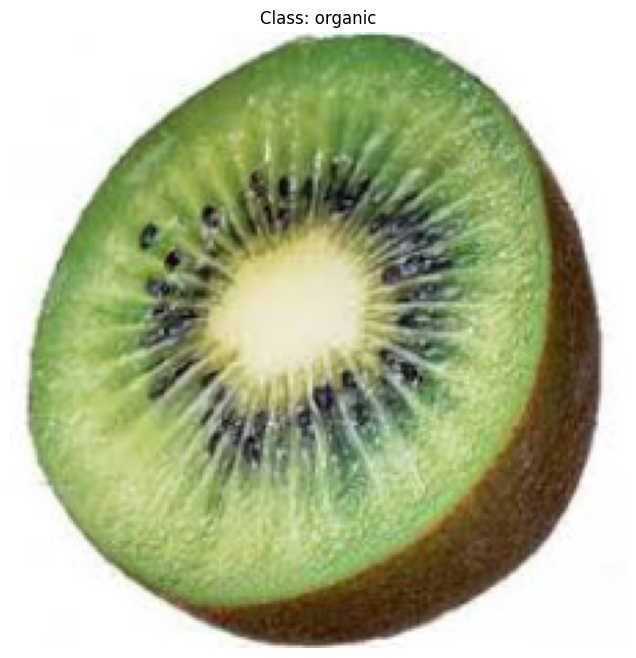

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(images[0], title=f"Class: {train_dataset.classes[labels[0]]}")


In [4]:
import torch 
import clip 
from PIL import Image 

device="cuda" if torch.cuda.is_available() else "cpu"
model, preprocess=clip.load("ViT-B/32", device=device)

class_names=['electronic', 'glass', 'metal', 'organic', 'paper', 'plastic']
text_inputs=clip.tokenize([f"A photo of {c} waste" for c in class_names]).to(device)

print("Model loaded successfully")

Model loaded successfully


D:\hehe\envs\pytorch2\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.38883203..1.5729485].


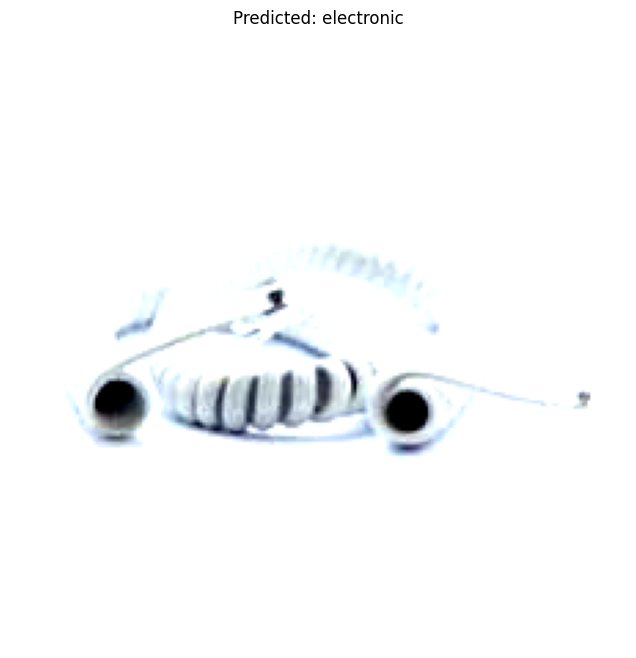

In [5]:
import numpy as np

test_image_path = test_dataset.samples[0][0]  
image = preprocess(Image.open(test_image_path)).unsqueeze(0).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_inputs)

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

similarity = (image_features @ text_features.T).squeeze(0).cpu().numpy()

predicted_class_idx = np.argmax(similarity)
predicted_class = class_names[predicted_class_idx]

imshow(preprocess(Image.open(test_image_path)), title=f"Predicted: {predicted_class}")


In [6]:
correct = 0
total = 0

with torch.no_grad():
    for image_path, label in test_dataset.samples:
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

        image_features = model.encode_image(image)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        similarity = (image_features @ text_features.T).squeeze(0).cpu().numpy()
        predicted_class_idx = np.argmax(similarity)

        if predicted_class_idx == label:
            correct += 1
        total += 1

accuracy = (correct / total) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 82.50%
